### Load and explore the daatset

In [3]:
# import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# load training data
train_df = pd.read_csv("CMaps/train_FD001.txt",sep=" ",header=None)
# drop empty columns
train_df = train_df.dropna(axis=1,how="all")
# assign column names
columns = ["unit_number","time_in_cycles","operational_setting_1","operational_setting_2","operational_setting_3"]\
    +[f"sensor_{i}" for i in range(1,train_df.shape[1]-5+1)]
train_df.columns = columns
print(train_df.shape)
print(train_df.head())

(20631, 26)
   unit_number  time_in_cycles  operational_setting_1  operational_setting_2  \
0            1               1                -0.0007                -0.0004   
1            1               2                 0.0019                -0.0003   
2            1               3                -0.0043                 0.0003   
3            1               4                 0.0007                 0.0000   
4            1               5                -0.0019                -0.0002   

   operational_setting_3  sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  \
0                  100.0    518.67    641.82   1589.70   1400.60     14.62   
1                  100.0    518.67    642.15   1591.82   1403.14     14.62   
2                  100.0    518.67    642.35   1587.99   1404.20     14.62   
3                  100.0    518.67    642.35   1582.79   1401.87     14.62   
4                  100.0    518.67    642.37   1582.85   1406.22     14.62   

   ...  sensor_12  sensor_13  sensor_1

### Add RUL column

In [4]:
# compute RUL
rul_df = train_df.groupby("unit_number")["time_in_cycles"].max().reset_index()
rul_df.columns = ["unit_number","max_cycle"]

In [5]:
# Merge with training data
train_df = train_df.merge(rul_df,on="unit_number")
train_df["RUL"] = train_df["max_cycle"] - train_df["time_in_cycles"]
train_df = train_df.drop(columns = ["max_cycle"])
print(train_df.head())

   unit_number  time_in_cycles  operational_setting_1  operational_setting_2  \
0            1               1                -0.0007                -0.0004   
1            1               2                 0.0019                -0.0003   
2            1               3                -0.0043                 0.0003   
3            1               4                 0.0007                 0.0000   
4            1               5                -0.0019                -0.0002   

   operational_setting_3  sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  \
0                  100.0    518.67    641.82   1589.70   1400.60     14.62   
1                  100.0    518.67    642.15   1591.82   1403.14     14.62   
2                  100.0    518.67    642.35   1587.99   1404.20     14.62   
3                  100.0    518.67    642.35   1582.79   1401.87     14.62   
4                  100.0    518.67    642.37   1582.85   1406.22     14.62   

   ...  sensor_13  sensor_14  sensor_15  sensor_16

### EDA

In [6]:
# check for null values
print(train_df.isnull().sum())

unit_number              0
time_in_cycles           0
operational_setting_1    0
operational_setting_2    0
operational_setting_3    0
sensor_1                 0
sensor_2                 0
sensor_3                 0
sensor_4                 0
sensor_5                 0
sensor_6                 0
sensor_7                 0
sensor_8                 0
sensor_9                 0
sensor_10                0
sensor_11                0
sensor_12                0
sensor_13                0
sensor_14                0
sensor_15                0
sensor_16                0
sensor_17                0
sensor_18                0
sensor_19                0
sensor_20                0
sensor_21                0
RUL                      0
dtype: int64


In [7]:
# statistical summary of numeric columns 
print(train_df.describe())

        unit_number  time_in_cycles  operational_setting_1  \
count  20631.000000    20631.000000           20631.000000   
mean      51.506568      108.807862              -0.000009   
std       29.227633       68.880990               0.002187   
min        1.000000        1.000000              -0.008700   
25%       26.000000       52.000000              -0.001500   
50%       52.000000      104.000000               0.000000   
75%       77.000000      156.000000               0.001500   
max      100.000000      362.000000               0.008700   

       operational_setting_2  operational_setting_3      sensor_1  \
count           20631.000000                20631.0  2.063100e+04   
mean                0.000002                  100.0  5.186700e+02   
std                 0.000293                    0.0  6.537152e-11   
min                -0.000600                  100.0  5.186700e+02   
25%                -0.000200                  100.0  5.186700e+02   
50%                 0.00000

In [8]:
# check for duplicated records
print(train_df.duplicated().sum())

0


In [9]:
# Basic info about each column
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unit_number            20631 non-null  int64  
 1   time_in_cycles         20631 non-null  int64  
 2   operational_setting_1  20631 non-null  float64
 3   operational_setting_2  20631 non-null  float64
 4   operational_setting_3  20631 non-null  float64
 5   sensor_1               20631 non-null  float64
 6   sensor_2               20631 non-null  float64
 7   sensor_3               20631 non-null  float64
 8   sensor_4               20631 non-null  float64
 9   sensor_5               20631 non-null  float64
 10  sensor_6               20631 non-null  float64
 11  sensor_7               20631 non-null  float64
 12  sensor_8               20631 non-null  float64
 13  sensor_9               20631 non-null  float64
 14  sensor_10              20631 non-null  float64
 15  se

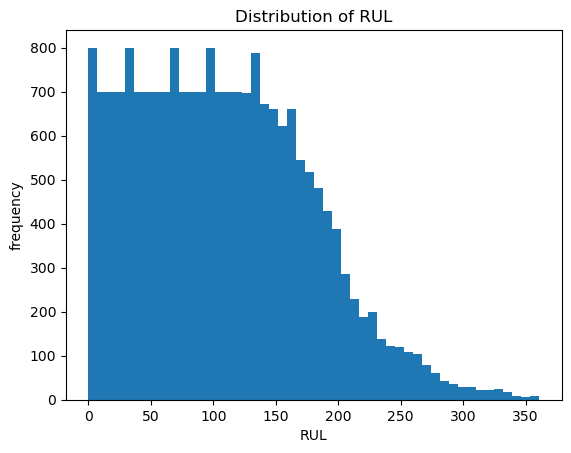

In [10]:
# distribution of RUL
plt.hist(train_df["RUL"],bins=50)
plt.xlabel("RUL")
plt.ylabel("frequency")
plt.title("Distribution of RUL")
plt.show()

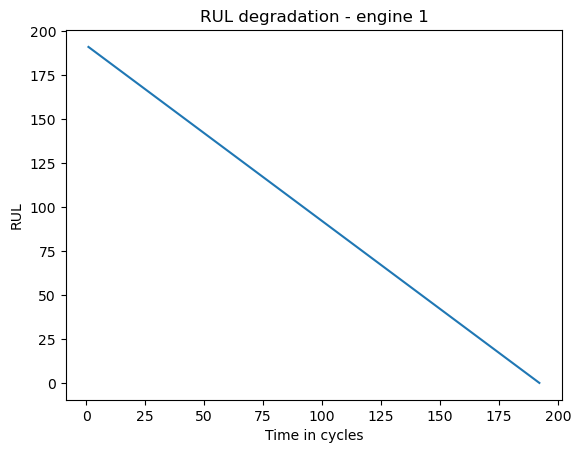

In [11]:
# cycles vs RUL (see how RUL decreases over time for an engine)
sample_engine = train_df[train_df["unit_number"]==1]
plt.plot(sample_engine["time_in_cycles"],sample_engine["RUL"])
plt.xlabel("Time in cycles")
plt.ylabel("RUL")
plt.title("RUL degradation - engine 1")
plt.show()

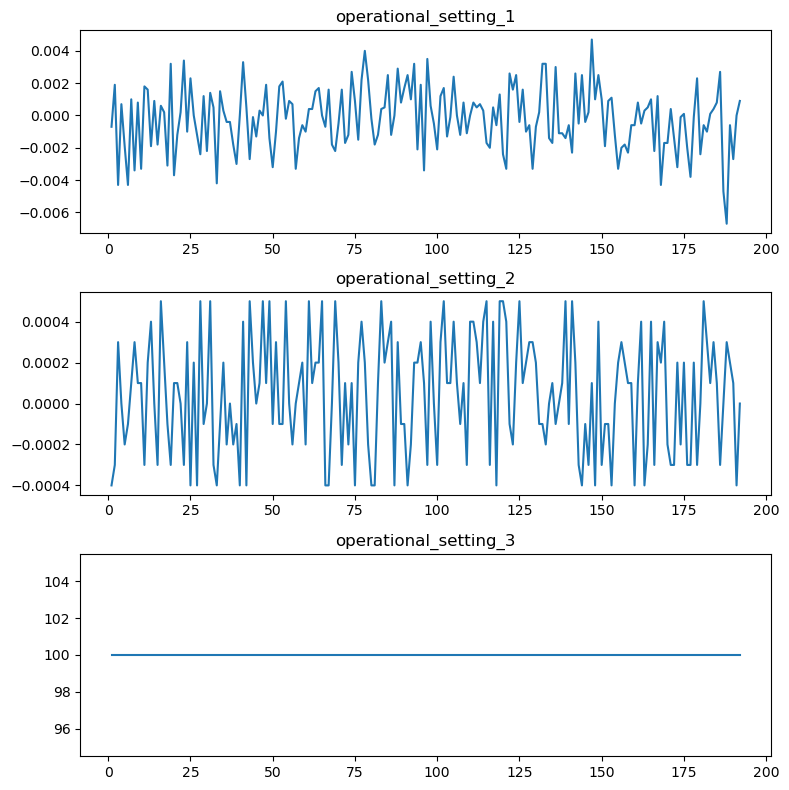

In [12]:
# opeartional settings treand
fig, axs = plt.subplots(3, 1, figsize=(8, 8))
for i, col in enumerate(["operational_setting_1", "operational_setting_2", "operational_setting_3"]):
    axs[i].plot(sample_engine["time_in_cycles"], sample_engine[col])
    axs[i].set_title(col)
plt.tight_layout()
plt.show()

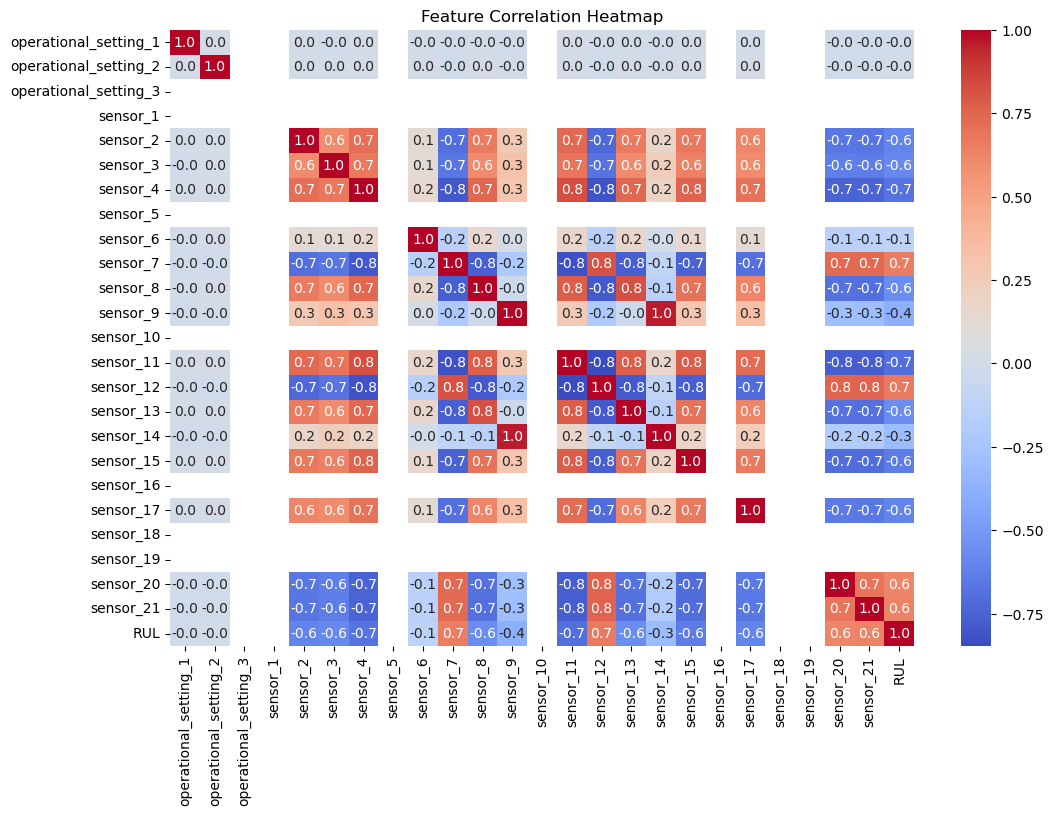

In [13]:
# correlations
corr = train_df.drop(["unit_number","time_in_cycles"], axis=1).corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm",annot=True,fmt=".1f")
plt.title("Feature Correlation Heatmap")
plt.show()

### Drop uselesss features

In [14]:
# sensor 1,5,10,16,18,19 and operational_setting_3 are constant throgh out all the records
# They have no power in prediction
# we should drop them
train_df = train_df.drop(columns={"operational_setting_3"})
drop_sensors = ["sensor_1","sensor_5","sensor_10","sensor_16","sensor_18","sensor_19"]
train_df = train_df.drop(columns = drop_sensors)
train_df.head()

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,sensor_2,sensor_3,sensor_4,sensor_6,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187


In [15]:
# compute correlation with RUL and drop the columns which have very week(close to 0) relations with RUL
rul_corr = corr["RUL"]
print(rul_corr)

operational_setting_1   -0.003198
operational_setting_2   -0.001948
operational_setting_3         NaN
sensor_1                      NaN
sensor_2                -0.606484
sensor_3                -0.584520
sensor_4                -0.678948
sensor_5                      NaN
sensor_6                -0.128348
sensor_7                 0.657223
sensor_8                -0.563968
sensor_9                -0.390102
sensor_10                     NaN
sensor_11               -0.696228
sensor_12                0.671983
sensor_13               -0.562569
sensor_14               -0.306769
sensor_15               -0.642667
sensor_16                     NaN
sensor_17               -0.606154
sensor_18                     NaN
sensor_19                     NaN
sensor_20                0.629428
sensor_21                0.635662
RUL                      1.000000
Name: RUL, dtype: float64


In [16]:
# select useful sensors based on threshold
threshold = 0.2
useful_features = rul_corr[abs(rul_corr)>threshold].index.tolist()
print(useful_features)

['sensor_2', 'sensor_3', 'sensor_4', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17', 'sensor_20', 'sensor_21', 'RUL']


In [17]:
# new dataset after removing those columns
train_df = train_df[["unit_number"]+useful_features]
print(train_df.shape)
print("--------------------------------------------------------")
print(train_df.head())

(20631, 16)
--------------------------------------------------------
   unit_number  sensor_2  sensor_3  sensor_4  sensor_7  sensor_8  sensor_9  \
0            1    641.82   1589.70   1400.60    554.36   2388.06   9046.19   
1            1    642.15   1591.82   1403.14    553.75   2388.04   9044.07   
2            1    642.35   1587.99   1404.20    554.26   2388.08   9052.94   
3            1    642.35   1582.79   1401.87    554.45   2388.11   9049.48   
4            1    642.37   1582.85   1406.22    554.00   2388.06   9055.15   

   sensor_11  sensor_12  sensor_13  sensor_14  sensor_15  sensor_17  \
0      47.47     521.66    2388.02    8138.62     8.4195        392   
1      47.49     522.28    2388.07    8131.49     8.4318        392   
2      47.27     522.42    2388.03    8133.23     8.4178        390   
3      47.13     522.86    2388.08    8133.83     8.3682        392   
4      47.28     522.19    2388.04    8133.80     8.4294        393   

   sensor_20  sensor_21  RUL  
0   

In [18]:
# Remove highly corelated features (based on RUL correlation)
# calculate correaltion matrix
corr_matrix = train_df.corr()
# Threshold for high correlation
threshold = 0.9
# track columns to drop
to_drop = set()

for col in corr_matrix.columns:
    for row in corr_matrix.index:
        if col != row and abs(corr_matrix.loc[row,col]) > threshold:
            # check which has stronger correaltion with traget
            target_corr_col = abs(corr_matrix.loc[col,"RUL"])
            target_corr_row = abs(corr_matrix.loc[row,"RUL"])

            # drop the waeker one
            if target_corr_col < target_corr_row:
                to_drop.add(col)
            else:
                to_drop.add(row)

# Drop correalated features
train_df = train_df.drop(columns = list(to_drop))

print("dropped columns:",to_drop)
print("-----------------------------------------------")
print(train_df.head())        

dropped columns: {'sensor_14'}
-----------------------------------------------
   unit_number  sensor_2  sensor_3  sensor_4  sensor_7  sensor_8  sensor_9  \
0            1    641.82   1589.70   1400.60    554.36   2388.06   9046.19   
1            1    642.15   1591.82   1403.14    553.75   2388.04   9044.07   
2            1    642.35   1587.99   1404.20    554.26   2388.08   9052.94   
3            1    642.35   1582.79   1401.87    554.45   2388.11   9049.48   
4            1    642.37   1582.85   1406.22    554.00   2388.06   9055.15   

   sensor_11  sensor_12  sensor_13  sensor_15  sensor_17  sensor_20  \
0      47.47     521.66    2388.02     8.4195        392      39.06   
1      47.49     522.28    2388.07     8.4318        392      39.00   
2      47.27     522.42    2388.03     8.4178        390      38.95   
3      47.13     522.86    2388.08     8.3682        392      38.88   
4      47.28     522.19    2388.04     8.4294        393      38.90   

   sensor_21  RUL  
0    

### Data Preprocessing

In [19]:
# Separate Target and indpendent columns
X = train_df.drop(columns=["unit_number","RUL"])
y = train_df["RUL"]

print(X.shape)
print(y.shape)

(20631, 13)
(20631,)


In [20]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state =42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16504, 13)
(4127, 13)
(16504,)
(4127,)


In [21]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear Regression model

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)
y_pred = lr.predict(X_test_scaled)

In [23]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

print("Linear Regression Performance.")
print(f"MAE : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R2_score : {r2:.2f}")

Linear Regression Performance.
MAE : 34.09
RMSE : 44.38
R2_score : 0.57


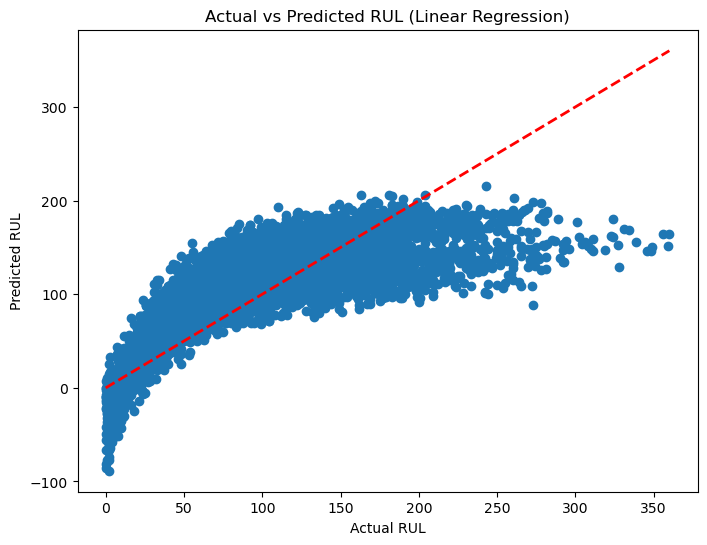

In [24]:
# plot actual vs predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color="red",linestyle="--",linewidth=2)
plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.title("Actual vs Predicted RUL (Linear Regression)")
plt.show()

### Ridge Regression model

In [25]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha = 1.0,random_state=42)
ridge_model.fit(X_train_scaled,y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

In [26]:
# Evaluate the model
mae = mean_absolute_error(y_test,y_pred_ridge)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_ridge))
r2 = r2_score(y_test,y_pred_ridge)

print("Ridge Regression Performance.")
print(f"MAE : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R2_score : {r2:.2f}")

Ridge Regression Performance.
MAE : 34.09
RMSE : 44.38
R2_score : 0.57


### Random Forest Regressor model

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100,random_state=42)
rf.fit(X_train_scaled,y_train)
y_pred_rf = rf.predict(X_test_scaled)

In [28]:
# Evaluate the model
mae = mean_absolute_error(y_test,y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))
r2 = r2_score(y_test,y_pred_rf)

print("Random Forest Regressor Performance.")
print(f"MAE : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R2_score : {r2:.2f}")

Random Forest Regressor Performance.
MAE : 29.94
RMSE : 41.87
R2_score : 0.62


### XGBoost Regressor Model

In [29]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators = 100, learning_rate=0.1,random_state=42)
xgb.fit(X_train_scaled,y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

In [30]:
# Evaluate the model
mae = mean_absolute_error(y_test,y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_xgb))
r2 = r2_score(y_test,y_pred_xgb)

print("XGB Regressor Performance.")
print(f"MAE : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R2_score : {r2:.2f}")

XGB Regressor Performance.
MAE : 29.97
RMSE : 41.80
R2_score : 0.62


#### LSTM Model (best for time-series dataset)

In [56]:
# load the dataset and naming the columns as we do earlier
train_df = pd.read_csv("CMaps/train_FD001.txt",sep=" ",header=None)
train_df = train_df.dropna(axis=1,how="all")
# assign column names
columns = ["unit_number","time_in_cycles","operational_setting_1","operational_setting_2","operational_setting_3"]\
    +[f"sensor_{i}" for i in range(1,train_df.shape[1]-5+1)]
train_df.columns = columns

In [57]:
# compute RUL
rul_df = train_df.groupby("unit_number")["time_in_cycles"].max().reset_index()
rul_df.columns = ["unit_number","max_cycle"]

In [58]:
# Merge with training data
train_df = train_df.merge(rul_df,on="unit_number")
train_df["RUL"] = train_df["max_cycle"] - train_df["time_in_cycles"]
train_df = train_df.drop(columns = ["max_cycle"])
print(train_df.head())

   unit_number  time_in_cycles  operational_setting_1  operational_setting_2  \
0            1               1                -0.0007                -0.0004   
1            1               2                 0.0019                -0.0003   
2            1               3                -0.0043                 0.0003   
3            1               4                 0.0007                 0.0000   
4            1               5                -0.0019                -0.0002   

   operational_setting_3  sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  \
0                  100.0    518.67    641.82   1589.70   1400.60     14.62   
1                  100.0    518.67    642.15   1591.82   1403.14     14.62   
2                  100.0    518.67    642.35   1587.99   1404.20     14.62   
3                  100.0    518.67    642.35   1582.79   1401.87     14.62   
4                  100.0    518.67    642.37   1582.85   1406.22     14.62   

   ...  sensor_13  sensor_14  sensor_15  sensor_16

In [59]:
features = ["operational_setting_1","operational_setting_2",
            "sensor_2","sensor_3","sensor_4","sensor_6","sensor_7",
            "sensor_8","sensor_9","sensor_11","sensor_12","sensor_13",
            "sensor_14","sensor_15","sensor_17","sensor_20","sensor_21"
            ]
# Here we will only use 17 columns and do not use the flat(constant) columns

In [60]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout

In [61]:
# scaling the features
scaler = StandardScaler()
train_df[features] = scaler.fit_transform(train_df[features])

** Sequence creation for LSTM

In [62]:
# sequence length
sequence_length = 30
def create_sequences(data,seq_length,features,target_col="RUL"):
    X,y = [],[]
    units = data["unit_number"].unique()

    for unit in units:
        unit_data = data[data["unit_number"]==unit]
        unit_features = unit_data[features].values
        unit_target = unit_data[target_col].values

        for i in range(len(unit_data)-seq_length+1):
            X.append(unit_features[i:i+seq_length])
            y.append(unit_target[i+seq_length-1])
    return np.array(X),np.array(y)

X,y = create_sequences(train_df,sequence_length,features)
print("X shape:",X.shape)
print("y shape:",y.shape)

X shape: (17731, 30, 17)
y shape: (17731,)


In [65]:
# train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14184, 30, 17)
(3547, 30, 17)
(14184,)
(3547,)


### Build LSTM model

In [66]:
model = Sequential()
model.add(LSTM(64,activation="tanh",return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(32,activation="tanh"))
model.add(Dropout(0.2))
model.add(Dense(16,activation="relu"))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mse",metrics=["mae"])
model.summary()

c:\Users\kanha\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │        20,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,953 (132.63 KB)

 Trainable params: 33,953 (132.63 KB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [67]:
history = model.fit(
    X_train,y_train,
    validation_data=(X_test,y_test),
    epochs=20,
    batch_size=64,
    verbose=1
)

Epoch 1/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - loss: 11175.3584 - mae: 86.4178 - val_loss: 6510.1030 - val_mae: 59.5918
Epoch 2/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 5119.2871 - mae: 50.7185 - val_loss: 2017.0927 - val_mae: 28.8884
Epoch 3/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 1780.0487 - mae: 27.6226 - val_loss: 1118.8220 - val_mae: 21.1880
Epoch 4/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 1092.9124 - mae: 21.9190 - val_loss: 850.4136 - val_mae: 19.5398
Epoch 5/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 959.8242 - mae: 20.7283 - val_loss: 781.9734 - val_mae: 19.1900
Epoch 6/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 909.3564 - mae: 20.2914 - val_loss: 734.4407 - val_mae: 18.2389
Epoch 7/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 808.2132 - mae: 18.9146 - val_loss: 663.6417 - val_mae: 17.0562
Epoch 8/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 749.1999 - mae: 18.4283 - val_loss: 617.0192 - val_mae:

In [68]:
# Evaluattion
loss,mae = model.evaluate(X_test,y_test)
print("Test MSE:",loss)
print("Test MAE:",mae)

111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 210.5114 - mae: 9.7994
Test MSE: 196.09596252441406
Test MAE: 9.690279006958008


In [69]:
# r2_score
y_pred = model.predict(X_test)
r2 = r2_score(y_test,y_pred)
print("R2 score:",r2)

111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
R2 score: 0.9487412571907043


### Plot training curves

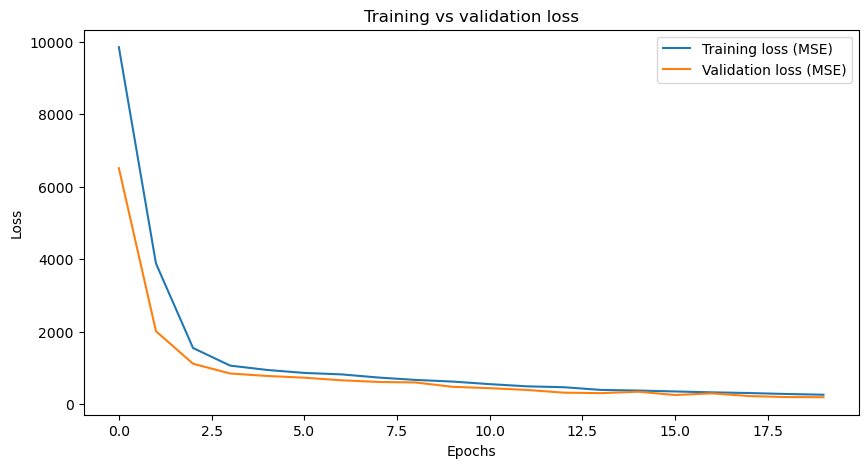

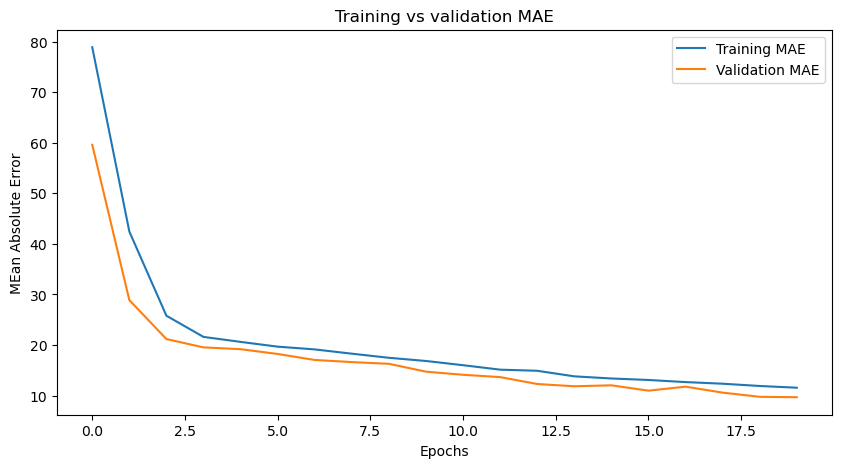

In [71]:
# plot training and validation loss
plt.figure(figsize = (10,5))
plt.plot(history.history["loss"],label = "Training loss (MSE)")
plt.plot(history.history["val_loss"],label = "Validation loss (MSE)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs validation loss")
plt.legend()
plt.show()
# plot Training and validation MAE
plt.figure(figsize = (10,5))
plt.plot(history.history["mae"],label = "Training MAE")
plt.plot(history.history["val_mae"],label = "Validation MAE")
plt.xlabel("Epochs")
plt.ylabel("MEan Absolute Error")
plt.title("Training vs validation MAE")
plt.legend()
plt.show()

### Save the model

In [75]:
# save the model in HDF5 format
model.save("lstm_rul_model.keras")
print("model saved as lstm_rul_model.keras")

model saved as lstm_rul_model.keras


In [74]:
# save scalers
import joblib
joblib.dump(scaler,"scaler_lstm.pkl")

['scaler_lstm.pkl']

In [80]:
# create a sample csv file for prediction
data = (train_df[train_df["unit_number"]==1].head(60))[features]
data.to_csv("sample.csv",index=False)

In [ ]:
###########################################################